In [1]:
import torch
import torch.nn as nn
from torch.nn import BCEWithLogitsLoss
from torch.distributions import Normal

import math
import time

from Data import *
from nets.LTU import LTU
from flows import PlanarFlow

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
def base_dist():
    return Normal(
        loc=torch.zeros(2, device=device),
        scale=torch.ones(2, device=device),
    )

In [4]:
batch_size = 32
datapath = '/home/mvasist/ProbAI/NormFlows/datasets/'
dset = 'two_moons'
Data = Data(datapath + dset +'.csv')

train_dataloader, test_dataloader = Data.return_dataloaders(batch_size = batch_size)

num_batches = train_dataloader.__len__()
 

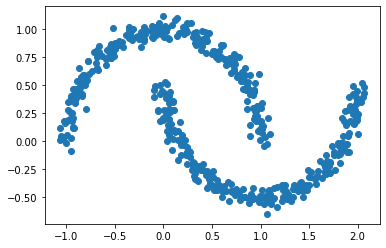

In [5]:
Data.plot_scatter()

## Planar

In [6]:
net = LTU()

In [7]:
flow_planar = PlanarFlow(net = net, dim= 1, device = device).to(device)
print(flow_planar.flow)

ModuleList(
  (0): Planar(
    (net): LTU(
      (layer1): Matmul()
      (layer2): Matadd()
      (layer3): Tanh()
      (layer4): Matmul()
    )
  )
)


In [8]:
z_samples = flow_planar.sample(450)
z_samples

0 tensor([0.1228, 0.0802], device='cuda:0') sample


/home/mvasist/ProbAI/NormFlows/flows/planar.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  comp = torch.le(torch.abs(initial - previous_data).data, torch.tensor(convergence))


tensor([-0.0057, -0.0101], device='cuda:0') s
1 tensor([-1.5666, -0.1746], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
2 tensor([ 0.9429, -0.2508], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
3 tensor([-1.9557,  0.9110], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
4 tensor([-0.9490, -0.1892], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
5 tensor([0.7039, 0.7627], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
6 tensor([-0.1907, -1.6827], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
7 tensor([-0.0454,  0.8242], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
8 tensor([-0.9277,  0.3930], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
9 tensor([ 1.2421, -0.3716], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
10 tensor([0.7600, 0.6753], device='cuda:0') sample
tensor([-0.00

tensor([-0.0057, -0.0101], device='cuda:0') s
109 tensor([0.5240, 0.7314], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
110 tensor([1.7117, 1.7922], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
111 tensor([-1.4295, -1.3348], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
112 tensor([0.8036, 0.8304], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
113 tensor([0.5429, 0.1087], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
114 tensor([1.8081, 0.9940], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
115 tensor([-1.3091,  0.7276], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
116 tensor([-0.8434,  0.3281], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
117 tensor([-1.2904, -0.9869], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
118 tensor([-1.7326, -0.1732], device='cuda:0') sample


215 tensor([1.7640, 0.6579], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
216 tensor([0.0973, 0.7519], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
217 tensor([0.2830, 0.8260], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
218 tensor([0.3008, 0.2266], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
219 tensor([0.8296, 1.1170], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
220 tensor([-0.9587, -0.3254], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
221 tensor([0.8761, 1.1130], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
222 tensor([1.6062, 0.6697], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
223 tensor([-0.0238, -0.2965], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
224 tensor([-0.3712,  1.0595], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
225 

tensor([-0.0057, -0.0101], device='cuda:0') s
318 tensor([ 0.3446, -1.3328], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
319 tensor([1.6913, 0.0352], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
320 tensor([ 0.7984, -0.9136], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
321 tensor([1.0214, 2.2539], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
322 tensor([0.5365, 2.0215], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
323 tensor([ 0.3636, -0.2110], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
324 tensor([-0.2274,  0.5116], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
325 tensor([-1.4685,  0.2306], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
326 tensor([0.3619, 0.7449], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
327 tensor([-1.2368, -0.4322], device='cuda:0') sampl

420 tensor([-0.4778,  0.2428], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
421 tensor([1.1196, 1.4017], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
422 tensor([-0.1747, -0.1501], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
423 tensor([ 1.4085, -1.0697], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
424 tensor([-0.0694, -0.1334], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
425 tensor([ 0.0026, -0.4692], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
426 tensor([ 1.0816, -1.3087], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
427 tensor([0.0458, 1.0234], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
428 tensor([ 1.2851, -0.4353], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:0') s
429 tensor([-1.1501,  0.4593], device='cuda:0') sample
tensor([-0.0057, -0.0101], device='cuda:

tensor([[-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0.0101],
        [-0.0057, -0

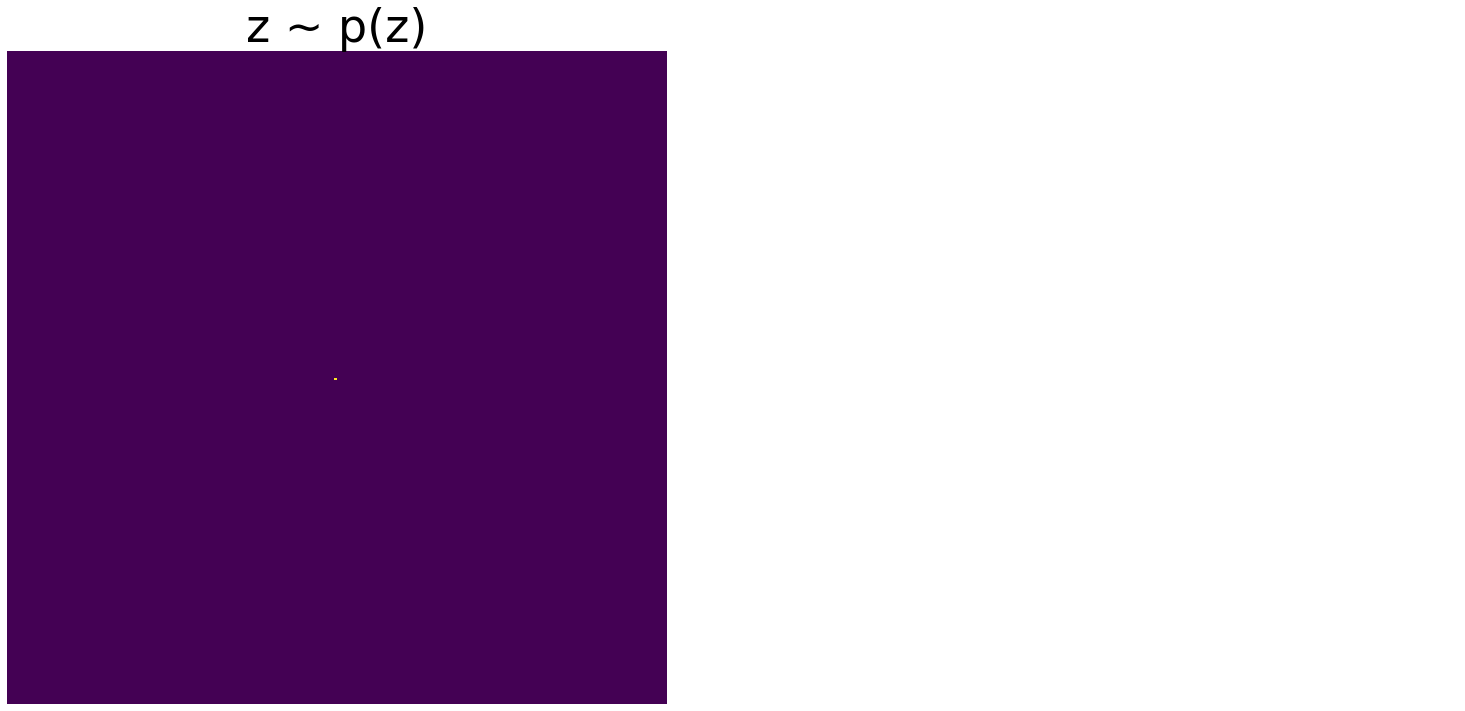

In [9]:
fig = Data.plot_samples(z_samples, None, r'z ~ p(z)', None, 256)

In [ ]:
#Train

optimizer = torch.optim.Adam(flow_planar.parameters())
epochs = 1000

start  = time.time()

print('Training...')

flow_planar = flow_planar.train()

for epoch in range(epochs):
    loss_sum = 0.0
    for i, x in enumerate(train_dataloader):
        x = x.to(device)
        optimizer.zero_grad()
        z, log_det = flow_planar.flow_outputs(x)
        if torch.isnan(z).any() : 
            continue
        log_prob = base_dist().log_prob(z).sum(1) + log_det
        loss = -log_prob.mean()
        loss.backward()
        optimizer.step()
        loss_sum += loss.detach().cpu().item()
    if epoch %100 == 0 :    
        print('Epoch: {}/{}, Loss: {:.3f}'.format(epoch+1, epochs, loss_sum/len(train_dataloader)))

flow_planar = flow_planar.eval()

end = time.time()
print('Training takes ', (end-start)/3600, ' hrs')

In [ ]:
x_dash = flow_planar.sample(128000)

fig = Data.plot_samples(z_samples, x_dash, r'z ~ p(z)', r'X = g(z)', 256)
fig.savefig('results/Planar_'+ dset +'_1.pdf')
